<a href="https://colab.research.google.com/github/lagaleno/computational_intelligence/blob/main/Lista2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Utils

In [111]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import random

In [112]:
# global constants

# Limits
UPPER_LIMIT = 1
LOWER_LIMIT = -1

In [113]:
def plotTargetFunction(function, classified_points, title):
  fig, ax = plt.subplots()
  ax.set_xlim(LOWER_LIMIT, UPPER_LIMIT)
  ax.set_ylim(LOWER_LIMIT, UPPER_LIMIT)
  for point in classified_points:
    plt.scatter(point['coordinates']['x'], point['coordinates']['y'], color=point['color'])
  ax.axline(function['Point-A'], function['Point-B'])
  plt.title(title)
  plt.show

In [114]:
def plotPoints(classified_points, weight, title):
  fig, ax = plt.subplots()
  ax.set_xlim(LOWER_LIMIT, UPPER_LIMIT)
  ax.set_ylim(LOWER_LIMIT, UPPER_LIMIT)
  for point in classified_points:
    plt.scatter(point['coordinates']['x'], point['coordinates']['y'], color=point['color'])
  x = np.array([LOWER_LIMIT, UPPER_LIMIT])
  y = -(weight[1]/weight[2])*x - (weight[0]/weight[2])
  plt.plot(x, y, color="black")
  plt.title(title)
  plt.show()

In [115]:
def plotHypothesisFunction(weight, classified_points):
  x = np.array([LOWER_LIMIT, UPPER_LIMIT])
  y = -(weight[1]/weight[2])*x - (weight[0]/weight[2])
  plt.plot(x, y, color="black")
  plt.show

# Defined Target Function

In [116]:
def generateTargetFunction():
  '''
    Return a dictionary that represents cordinates (x, y)
    of two points (point-a and point-b) randomly chosen that will form the line of the target function
  '''
  point_a = np.random.uniform(LOWER_LIMIT, UPPER_LIMIT, 2)
  point_b = np.random.uniform(LOWER_LIMIT, UPPER_LIMIT, 2)
  
  return {
      'Point-A': point_a,
      'Point-B': point_b,
  }

In [117]:
def generatePoints(n):
  '''
    Return a two dimensional array with points coordinates generated randomly [[x1, y1], [x2, y2], ... [xn, yn]]
  '''
  points = np.random.uniform(LOWER_LIMIT, UPPER_LIMIT, (n, 2))

  return points

In [118]:
def classify(target_function, points):
  '''
  Return:
  [
    {
      coordinates:{
        x: ...,
        y: ...,
      },
      classification: -1 | +1,
      color: red (-1) | green (+1)
    },
    ...
  ]
  '''
  res = []
  tf_vector = np.subtract(target_function['Point-A'], target_function['Point-B'])
  # do cross product to see "where" the point is in reference with the target function vector
  for point in points:
    point_vector = np.subtract(target_function['Point-A'], point)
    corss_product = np.cross(tf_vector, point_vector)
    sign = np.sign(corss_product)
    res.append({
        'coordinates': {
            'x': point[0],
            'y': point[1]
        },
        'classification': sign,
        'color': 'green' if sign > 0 else ('red' if sign < 0 else 'orange'),
    })
  
  return res;



In [119]:
def useTargetFunction(n):
  '''
    Recieve size of data and return a dictionary with:
    {
      target_function: {
        point_a,
        point_b
      },
      classified_points: {
        coordinate: {
          x: ...,
          y: ...,
        },
        classification: -1 | +1
        color: red | green
      }
    }
  '''

  # Define the tareget Function (my line)
  target_function = generateTargetFunction()

  # Given n random points (my data)
  points = generatePoints(n)

  # Classify this points as +1 ou -1 if above or not
  classified_points = classify(target_function, points)

  return {
      'raw_points': points,
      'target_function': target_function,
      'classified_points': classified_points,
  }

# Linear Regression

## Linear Regression without data transformation

In [120]:
def computePseudoInverse(data_matrix):
  '''
    Recieve the matrix X of data input e returns the pseudo-inverse
  '''
  transposed_matrix = data_matrix.transpose()
  dot_result = np.dot(transposed_matrix, data_matrix)
  inverse_factor = np.linalg.inv(dot_result)
  p_inverse = np.dot(inverse_factor, transposed_matrix)

  return p_inverse

In [121]:
def mountDataMatrixAndTargetVector(classified_points):
  '''
    Recieve dicstionary with classified_points and return data_matrix and target_vector
  '''
  data_matrix = []
  target_vector = []
  for point in classified_points:
    x = point['coordinates']['x']
    y = point['coordinates']['y']
    data_matrix.append([1, x, y])
    target_vector.append(point['classification'])
  
  return np.array(data_matrix), np.array(target_vector)

In [122]:
def linearRegression(classified_points):
  '''
    Recieve an array of points with coordinates x and y [[x1, y1], [x2, y2], ...]?
    Recieve de classified points? Classification works as the target vector?
  '''

  data_matrix, target_vector = mountDataMatrixAndTargetVector(classified_points)
  data_matrix_pinverse = computePseudoInverse(data_matrix)
  w = np.dot(data_matrix_pinverse, target_vector)

  return w

## Linear Regression with data transformation

In [123]:
def mountTransformedDataMatrixAndTargetVector(classified_points):
  '''
    Recieve dicstionary with classified_points and return data_matrix and target_vector
  '''
  data_matrix = []
  target_vector = []
  for point in classified_points:
    x = point['coordinates']['x']
    y = point['coordinates']['y']
    data_matrix.append([1, x, y, x*y, x**2, y**2])
    target_vector.append(point['classification'])
  
  return np.array(data_matrix), np.array(target_vector)

In [124]:
def transformedLinearRegression(classified_points):
  data_matrix, target_vector = mountTransformedDataMatrixAndTargetVector(classified_points)
  data_matrix_pinverse = computePseudoInverse(data_matrix)
  w = np.dot(data_matrix_pinverse, target_vector)

  return w

# Perceptron Learning Algorithm (PLA)

In [125]:
def getMisclassified(w, classified_points):
  '''
    Returns an array of dictionaries with points that were misclassified
    [
      {
        coordinate: {
          x: ...,
          y: ...,
        },
        classification: -1 | +1
        color: red | green
      }
    ]
  '''
  misclassified = []
  for data in classified_points:
    point = np.array([1, data['coordinates']['x'], data['coordinates']['y']])
    hx = np.sign(np.dot(w, point))
    # check misclassification
    if hx != data['classification']:
      misclassified.append(data)
  
  return misclassified

In [126]:
def updateWeight(w, point):
  '''
    Returns a numpy array with newy weights [a, b, c, d]
  '''
  coordinates = np.array([1, point['coordinates']['x'], point['coordinates']['y']])
  new_weight = np.add(w, np.multiply(point['classification'], coordinates))
  return new_weight

In [127]:
def perceptronAlgorithm(initial_w, classified_points):
  '''
    Return the weight that best aproximate and count of iterations
  '''
  # first iteration (w = output of linear regression)
  w = initial_w
  misclassified = getMisclassified(w, classified_points)
  cont = 0

  # loop over and check if classification is correct
  # if not correct store misclassified points and choose to loop over again
  while len(misclassified) != 0:
    # pick a missclassified point
    misclassified_point = random.choice(misclassified)
    # update o w
    w = updateWeight(w, misclassified_point)
    # try again
    misclassified = getMisclassified(w, classified_points)
    cont = cont + 1 # count which interation is

  return w, cont


# Train and Test

In [128]:
def classifyByHypothesis(weight, point):
  attributes = np.array([1, point[0], point[1]])
  hx = np.sign(np.dot(weight, attributes))
  return hx

In [129]:
def classifyByTransformedHypothesis(weight, point):
  x = point[0]
  y = point[1]
  attributes = np.array([1, x, y, x*y, x**2, y**2])
  hx = np.sign(np.dot(weight, attributes))
  return hx

In [130]:
def checkTransformClassifcation(w, points, classified_points, points_qtt):
  # Dot product to see perceptron classification and compare with the target_function classification
  count_not_equal = 0
  for i in range(len(points)):
    hx = classifyByTransformedHypothesis(w, points[i])
    if classified_points[i]['classification'] != hx:
      count_not_equal = count_not_equal + 1
      
  return count_not_equal/points_qtt

In [131]:
def checkClassification(w, points, classified_points, points_qtt):
  # Dot product to see perceptron classification and compare with the target_function classification
  count_not_equal = 0
  for i in range(len(points)):
    hx = classifyByHypothesis(w, points[i])
    if classified_points[i]['classification'] != hx:
      count_not_equal = count_not_equal + 1
      
  return count_not_equal/points_qtt

In [132]:
def trainLinearRegression(n_train):
  points_data = useTargetFunction(n_train)
  w = linearRegression(points_data['classified_points'])
  count_not_equal = checkClassification(w, points_data['raw_points'], points_data['classified_points'], n_train)
  
  return {
    'points_data': points_data,
    'count_not_equal': count_not_equal,
    'weight': w
  }

In [133]:
def testLinearRegressionAccuracy(n_test, train_data, w):
  '''
  Recieve 
  Return: {
    not_equal_classification: [number]
    number_of_iteration: [number]
  }
  '''
  ## Test ##
  # randomly generate points
  points = generatePoints(n_test)

  # Get it's correct classification
  test_points_classified = classify(train_data['target_function'], points)

  count_not_equal = checkClassification(w, points, test_points_classified, n_test)

  return {
  'count_not_equal': count_not_equal,
  'classified_by_target_f': test_points_classified
  }

# 5 e 6

In [134]:
def simulateLinearRegression(n_train, n_test, iteration = 1000):
  train_count_not_equal = []
  test_count_not_equal = []
  j = 0
  while j < iteration:

    # Do linear regression to get Weights
    train = trainLinearRegression(n_train)
    train_count_not_equal.append(train['count_not_equal'])


    ## Test ##
    test = testLinearRegressionAccuracy(n_test, train['points_data'], train['weight'])
    test_count_not_equal.append(test['count_not_equal'])

    j = j+1
  

  # plot
  # Plot training (last iteration data)
  plotTargetFunction(train['points_data']['target_function'], train['points_data']['classified_points'], "Pontos de Treino")
  plotHypothesisFunction(train['weight'], train['points_data']['classified_points'])
  
  # # Plot testing (last iteration data)
  plotTargetFunction(train['points_data']['target_function'], test['classified_by_target_f'], "Pontos de Teste")
  plotHypothesisFunction(train['weight'], test['classified_by_target_f'])

  # Ein
  train_mean_not_equal = np.sum(train_count_not_equal)/len(train_count_not_equal)
  print('a média de pontos que não coincidiram a classificação no treino = ' + str(train_mean_not_equal))
  # Eout
  test_mean_not_equal = np.sum(test_count_not_equal)/len(test_count_not_equal)
  print('a média de pontos que não coincidiram a classificação no teste = ' + str(test_mean_not_equal))

a média de pontos que não coincidiram a classificação no treino = 0.039770000000000014
a média de pontos que não coincidiram a classificação no teste = 0.050100000000000006


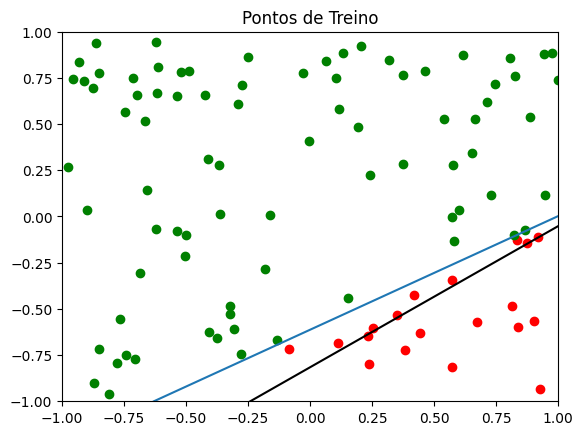

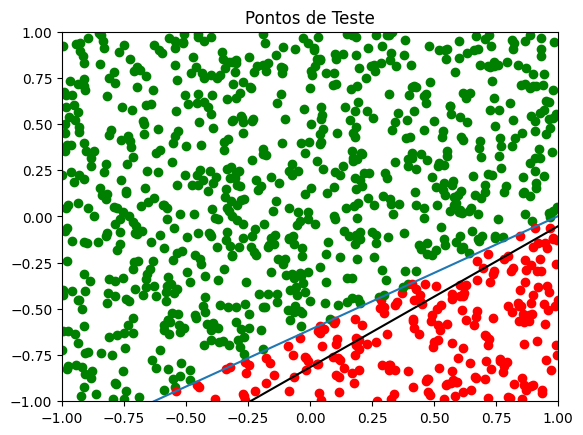

In [135]:
simulateLinearRegression(100, 1000, 1000)

# 7

In [136]:
def simulateLinearRegressionAndPerceptron(n_train, iteration = 1000):
  train_count_not_equal = []
  perceptron_iterations = []
  j = 0
  while j < iteration:

    # Do linear regression to get Weights
    train = trainLinearRegression(n_train)
    train_count_not_equal.append(train['count_not_equal'])


    ## Test using Perceptron ##
    final_w, cont = perceptronAlgorithm(train['weight'], train['points_data']['classified_points'])
    perceptron_iterations.append(cont)

    j = j+1
  

  # plot
  # Plot training (last iteration data)
  plotTargetFunction(train['points_data']['target_function'], train['points_data']['classified_points'], "Regressão Linear")
  plotHypothesisFunction(train['weight'], train['points_data']['classified_points'])
  
  # Plot perceptron outup (last iteration data)
  plotTargetFunction(train['points_data']['target_function'], train['points_data']['classified_points'], "Perceptron")
  plotHypothesisFunction(final_w, train['points_data']['classified_points'])

  # Ein
  train_mean_not_equal = np.sum(train_count_not_equal)/len(train_count_not_equal)
  print('a média de pontos que não coincidiram a classificação no treino = ' + str(train_mean_not_equal))

  # Interation - Perceptron
  mean_iteration = np.sum(perceptron_iterations)/len(perceptron_iterations)
  print('a média de iterações para o perceptron convergir tendo initial_w a saída da regressão linear foi: ' + str(mean_iteration))


a média de pontos que não coincidiram a classificação no treino = 0.0281
a média de iterações para o perceptron convergir tendo initial_w a saída da regressão linear foi: 4.539


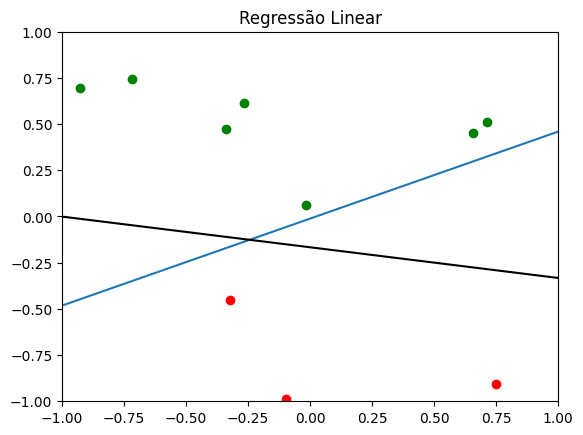

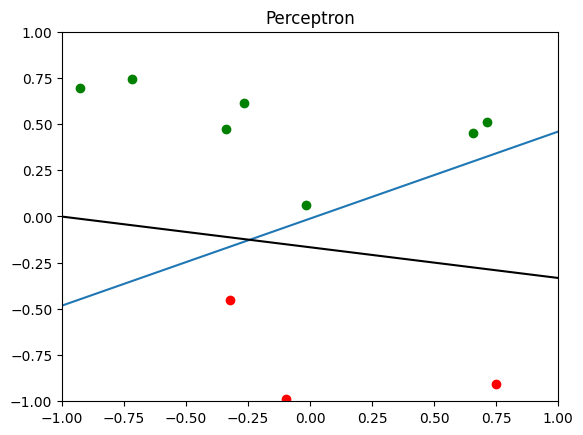

In [137]:
simulateLinearRegressionAndPerceptron(10, 1000)

a média de pontos que não coincidiram a classificação no treino = 0.039420000000000004
a média de iterações para o perceptron convergir tendo initial_w a saída da regressão linear foi: 110.389


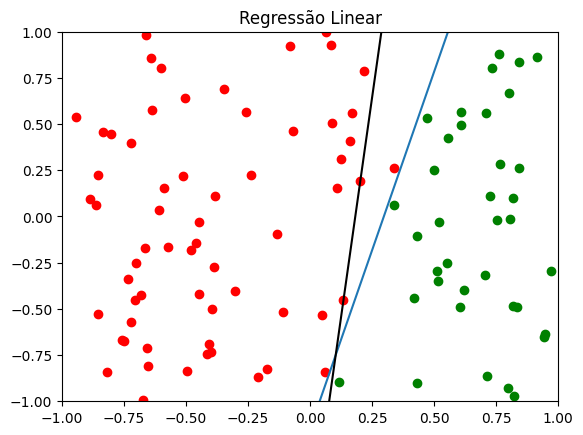

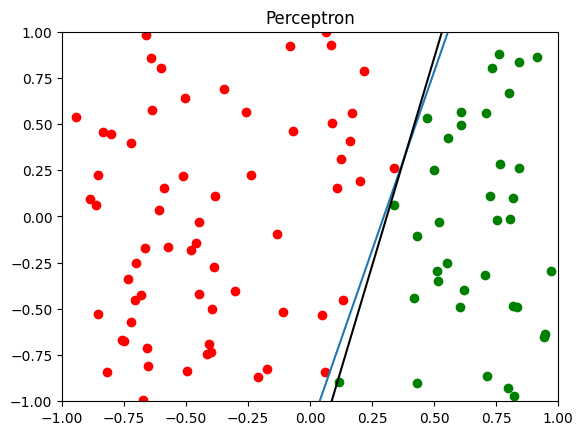

In [138]:
simulateLinearRegressionAndPerceptron(100, 1000)

# Nonlinear Transformation

## Target Function and Classifcation
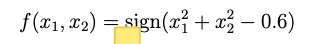

In [139]:
def classifyByF(points):
  classified = []
  for point in points:
    f = (point[0]**2) + (point[1]**2) - 0.6
    sign = np.sign(f)
    classified.append({
        'coordinates': {
            'x': point[0],
            'y': point[1]
        },
        'classification': sign,
        'color': 'green' if sign > 0 else ('red' if sign < 0 else 'orange'),
    })

  return classified

In [140]:
def addNoise(qtt, classified_points):

  randomIdx = random.sample(range(0, len(classified_points)), qtt)

  for i, point in enumerate(classified_points):
    if i in randomIdx:
      point['classification'] = point['classification'] * (-1.0)

  return classified_points

In [141]:
def trainNoiseLinearRegression(n_train):
  points = generatePoints(n_train)
  classified_points = classifyByF(points)
  classified_points_noise = addNoise(int(n_train*0.1), classified_points)
  w = linearRegression(classified_points_noise)

  # check if it's correct
  count_not_equal = checkClassification(w, points, classified_points_noise, n_train)

  return {
    'classified_points': classified_points,
    'classified_points_noise': classified_points_noise,
    'count_not_equal': count_not_equal,
    'weight': w
  }

In [142]:
def trainNoiseLinearRegressionWithTransform(n_train):
  points = generatePoints(n_train)
  classified_points = classifyByF(points)
  classified_points_noise = addNoise(int(n_train*0.1), classified_points)
  w = transformedLinearRegression(classified_points_noise)

  # check if it's correct
  count_not_equal = checkTransformClassifcation(w, points, classified_points_noise, n_train)

  return {
    'classified_points': classified_points,
    'classified_points_noise': classified_points_noise,
    'count_not_equal': count_not_equal,
    'weight': w
  }

In [143]:
def testLinearRegressionAccuracyWithTransform(n_test, w):
  '''
  Recieve 
  Return: {
    not_equal_classification: [number]
    number_of_iteration: [number]
  }
  '''
  ## Test ##
  # randomly generate points
  points = generatePoints(n_test)

  # Get it's correct classification
  test_points_classified = classifyByF(points)

  count_not_equal = checkTransformClassifcation(w, points, test_points_classified, n_test)

  return {
  'count_not_equal': count_not_equal,
  'classified_by_target_f': test_points_classified
  }

## 8

In [144]:
def noiseSimulation(n_train, iteration = 1000):
  train_count_not_equal = []
  j = 0
  while j < iteration:

    # Do linear regression to get Weights
    train = trainNoiseLinearRegression(n_train)
    train_count_not_equal.append(train['count_not_equal'])

    j = j+1
  

  # plot
  # Plot training (last iteration data)
  plotPoints(train['classified_points_noise'],train['weight'], "Pontos com ruído")
  # plotHypothesisFunction(train['weight'], train['classified_points_noise'])
  
  # Ein
  train_mean_not_equal = np.sum(train_count_not_equal)/len(train_count_not_equal)
  print('a média de pontos que não coincidiram a classificação no treino = ' + str(train_mean_not_equal))


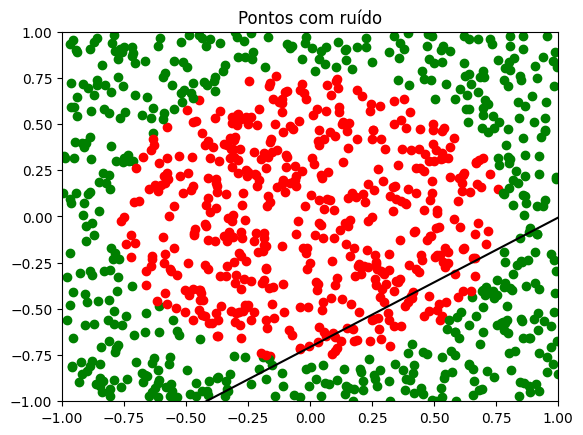

a média de pontos que não coincidiram a classificação no treino = 0.503795


In [145]:
noiseSimulation(1000, 1000)

## 9 - Com transformação Linear

In [146]:
def noiseSimulationWithTransformation(n_train, n_test, iteration = 1000):
  train_count_not_equal = []
  test_count_not_equal = []
  weights = {
      'w0': [],
      'w1': [],
      'w2': [],
      'w3': [],
      'w4': [],
      'w5': []
  }
  j = 0
  while j < iteration:

    # Do linear regression to get Weights
    train = trainNoiseLinearRegressionWithTransform(n_train)
    train_count_not_equal.append(train['count_not_equal'])
    weights['w0'].append(train['weight'][0])
    weights['w1'].append(train['weight'][1])
    weights['w2'].append(train['weight'][2])
    weights['w3'].append(train['weight'][3])
    weights['w4'].append(train['weight'][4])
    weights['w5'].append(train['weight'][5])

    test = testLinearRegressionAccuracyWithTransform(n_test, train['weight'])
    test_count_not_equal.append(test['count_not_equal'])

    j = j+1
  
  
  # Ein
  train_mean_not_equal = np.sum(train_count_not_equal)/len(train_count_not_equal)
  print('a média de pontos que não coincidiram a classificação no treino = ' + str(train_mean_not_equal))

  # Eout
  test_mean_not_equal = np.sum(test_count_not_equal)/len(test_count_not_equal)
  print('a média de pontos que não coincidiram a classificação no teste = ' + str(test_mean_not_equal))

  # w
  w0_mean = np.sum(weights['w0'])/len(weights['w0'])
  print("média w0 = " + str(w0_mean))

  w1_mean = np.sum(weights['w1'])/len(weights['w1'])
  print("média w1 = " + str(w1_mean))

  w2_mean = np.sum(weights['w2'])/len(weights['w2'])
  print("média w2 = " + str(w2_mean))

  w3_mean = np.sum(weights['w3'])/len(weights['w3'])
  print("média w3 = " + str(w3_mean))

  w4_mean = np.sum(weights['w4'])/len(weights['w4'])
  print("média w4 = " + str(w4_mean))

  w5_mean = np.sum(weights['w5'])/len(weights['w5'])
  print("média w5 = " + str(w5_mean))

In [147]:
noiseSimulationWithTransformation(1000, 1000)

a média de pontos que não coincidiram a classificação no treino = 0.12357699999999999
a média de pontos que não coincidiram a classificação no teste = 0.032425
média w0 = -0.9930122179752304
média w1 = 0.0003140461696638237
média w2 = 0.00020490516915852051
média w3 = -0.0032162962435400714
média w4 = 1.5603688746856728
média w5 = 1.5596467589739254


# Questão 11
Q11) Crie um conjunto de dados linearmente separável com 100 pontos em R² utilizando o mesmo procedimento descrito nas questões práticas do Perceptron da Lista 1. Agora, selecione aleatoriamente 10% dos pontos e inverta os rótulos dos pontos selecionados, efetivamente transformando o conjunto de dados em não-linearmente separável. Em seguida, implemente o algoritmo PLA pocket e treine-o neste conjunto de dados por k iterações. Ao término deste treinamento, gere 1000 pontos e rotule-os de acordo com a função alvo original; use estes pontos para estimar o E_out do pocket. Compare e discuta as seguintes configurações:

    11.1) Inicializando os pesos com 0; k = 10;
    11.2) Inicializando os pesos com 0; k = 50;
    11.3) Inicializando os pesos usando Regressão Linear; k = 10;
    11.4) Inicializando os pesos usando Regressão Linear; k = 50.

In [166]:
def perceptronAlgorithmPocket(limit, initial_w, classified_points):
  '''
    Limit: k

  '''
  # first iteration
  w = initial_w
  misclassified = getMisclassified(w, classified_points)
  pocket_e = len(misclassified)
  pocket_w = initial_w

  for i in range(limit):
    # pick a missclassified point
    misclassified_point = random.choice(misclassified)
    # update o w
    w = updateWeight(w, misclassified_point)
    # try again
    misclassified = getMisclassified(w, classified_points)
    # check if this w is better than the last one
    if len(misclassified) < pocket_e:
      pocket_e = len(misclassified)
      pocket_w = w
  
  return pocket_w

In [164]:
def simulatePLApocket(n_train, n_test, k, iterations = 1000):
  train_errors = []
  test_errors = []
  j = 0
  while j < iterations:
    ## Train ##

    # gerar os pontos e pegar a classificações corretas
    train_data = useTargetFunction(n_train)
    # addNoise
    noised_data = addNoise(int(n_train*0.1), train_data['classified_points'])
    # PLA Pocket
    w = perceptronAlgorithmPocket(k, np.array([0, 0, 0]), noised_data)
    # classify training points
    train_not_equal = checkClassification(w, train_data['raw_points'], noised_data, n_train)
    train_errors.append(train_not_equal)

    ## Test ##
    test_data = useTargetFunction(n_test)
    test_not_equal = checkClassification(w, test_data['raw_points'], test_data['classified_points'], n_test)
    test_errors.append(test_not_equal)


    j = j + 1


  # Ein
  train_mean_not_equal = np.sum(train_errors)/len(train_errors)
  print('a média de pontos que não coincidiram a classificação no treino = ' + str(train_mean_not_equal))
  # Eout
  test_mean_not_equal = np.sum(test_errors)/len(test_errors)
  print('a média de pontos que não coincidiram a classificação no teste = ' + str(test_mean_not_equal))

In [169]:
# 11.1
k = 10
simulatePLApocket(100, 1000, k, 1000)

a média de pontos que não coincidiram a classificação no treino = 0.17859999999999998
a média de pontos que não coincidiram a classificação no teste = 0.488642


In [168]:
# 11.2
k = 50
simulatePLApocket(100, 1000, k, 1000)

a média de pontos que não coincidiram a classificação no treino = 0.12647000000000003
a média de pontos que não coincidiram a classificação no teste = 0.503034


In [170]:
def simulatePLAwithRegression(n_train, n_test, k, iterations = 1000):
  train_errors = []
  test_errors = []
  j = 0
  while j < iterations:
    ## Train ##

    # gerar os pontos e pegar a classificações corretas
    train_data = useTargetFunction(n_train)
    # addNoise
    noised_data = addNoise(int(n_train*0.1), train_data['classified_points'])
    # Get w of Linear regression
    linear_regression_w = linearRegression(noised_data)
    # PLA Pocket
    w = perceptronAlgorithmPocket(k, linear_regression_w, noised_data)
    # classify training points
    train_not_equal = checkClassification(w, train_data['raw_points'], noised_data, n_train)
    train_errors.append(train_not_equal)

    ## Test ##
    test_data = useTargetFunction(n_test)
    test_not_equal = checkClassification(w, test_data['raw_points'], test_data['classified_points'], n_test)
    test_errors.append(test_not_equal)


    j = j + 1


  # Ein
  train_mean_not_equal = np.sum(train_errors)/len(train_errors)
  print('a média de pontos que não coincidiram a classificação no treino = ' + str(train_mean_not_equal))
  # Eout
  test_mean_not_equal = np.sum(test_errors)/len(test_errors)
  print('a média de pontos que não coincidiram a classificação no teste = ' + str(test_mean_not_equal))

In [171]:
# 11.3
k = 10
simulatePLAwithRegression(100, 1000, k, 1000)

a média de pontos que não coincidiram a classificação no treino = 0.12955
a média de pontos que não coincidiram a classificação no teste = 0.48979700000000004


In [172]:
# 11.4
k = 50
simulatePLAwithRegression(100, 1000, k, 1000)

a média de pontos que não coincidiram a classificação no treino = 0.11912000000000002
a média de pontos que não coincidiram a classificação no teste = 0.49634500000000004
